
--- SQL Task 1: Unique Launch Sites ---
    Launch_Site
0   CCAFS LC-40
1   VAFB SLC-4E
2    KSC LC-39A
3  CCAFS SLC-40

--- SQL Task 2: Launch Sites Starting with CCA ---
         Date Time (UTC) Booster_Version  Launch_Site  \
0  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  PAYLOAD_MASS__KG_  \
0               Dragon Spacecraft Qualification Unit                  0   
1  Dragon demo flight C1, two CubeSats, barrel of...                  0   
2                              Dragon demo flight C2                525   
3                                       SpaceX CRS-1                500   
4                                       SpaceX CRS-2                677   

       Orbit         Customer Mis

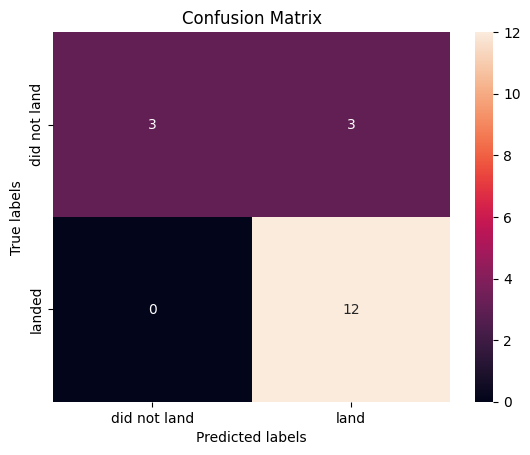


--- SVM Results ---
Tuned hyperparameters (best parameters): {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Accuracy (validation): 0.8482142857142856
Accuracy (test): 0.8333333333333334


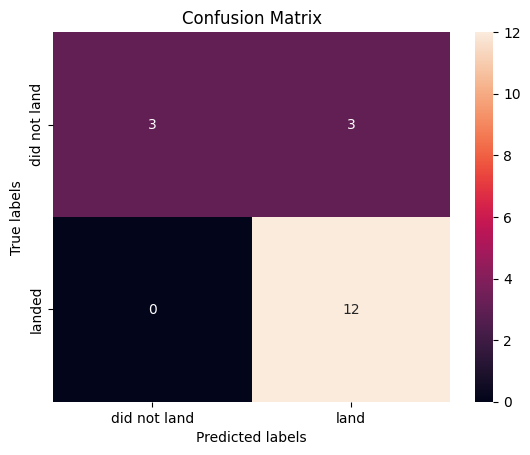


--- Decision Tree Results ---
Tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy (validation): 0.8767857142857143
Accuracy (test): 0.8333333333333334


C:\Users\billi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\billi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\billi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

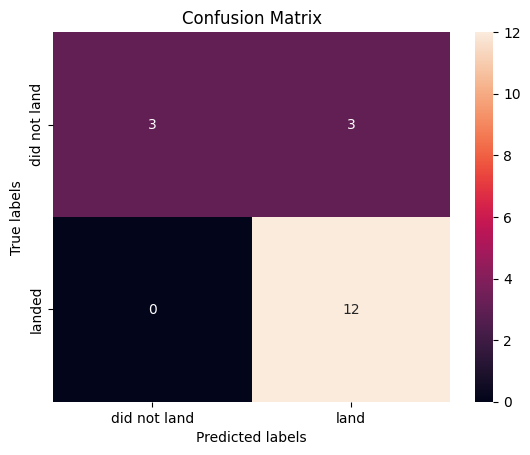


--- KNN Results ---
Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy (validation): 0.8482142857142858
Accuracy (test): 0.8333333333333334


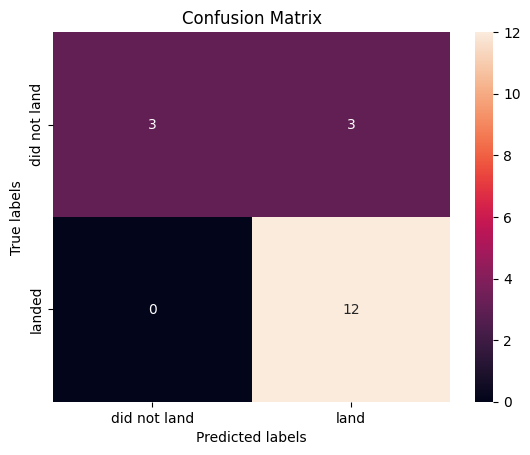


--- Best method : Decision Tree with Validation Accuracy of 0.8767857142857143---


In [4]:
# --- Section 1: Environment Setup & Data Loading ---
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import folium
import wget
from folium.plugins import MarkerCluster, MousePosition
from folium.features import DivIcon
import os
from math import sin, cos, sqrt, atan2, radians


# Install libraries
# !pip install sqlalchemy==1.3.9
# !pip install ipython-sql
# !pip install ipython-sql prettytable
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib
# !pip install scikit-learn
# !pip install folium
# !pip install wget


# Create database connection
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

# Load data
spacex_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv"
spacex_df = pd.read_csv(spacex_url)
spacex_df.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi")
cur.execute("DROP TABLE IF EXISTS SPACEXTABLE;")
cur.execute("CREATE TABLE SPACEXTABLE AS SELECT * FROM SPACEXTBL WHERE Date IS NOT NULL;")

data_part_2_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(data_part_2_url)

data_part_3_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
X = pd.read_csv(data_part_3_url)


# --- Section 0: Helper Function ---
# This function is to plot the confusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()
    plt.close()


# --- Section 2: SQL Data Analysis ---

# Task 1: Unique launch sites
print("\n--- SQL Task 1: Unique Launch Sites ---")
launch_sites = pd.read_sql_query("SELECT DISTINCT Launch_Site FROM SPACEXTABLE", con)
print(launch_sites)

# Task 2: Launch sites starting with CCA
print("\n--- SQL Task 2: Launch Sites Starting with CCA ---")
cca_sites = pd.read_sql_query("SELECT * FROM SPACEXTABLE WHERE Launch_Site LIKE 'CCA%' LIMIT 5", con)
print(cca_sites)

# Task 3: Total payload mass by NASA (CRS)
print("\n--- SQL Task 3: Total Payload Mass by NASA (CRS) ---")
total_nasa_payload = pd.read_sql_query("SELECT SUM(Payload_Mass__kg_) FROM SPACEXTABLE WHERE Customer = 'NASA (CRS)'", con)
print(total_nasa_payload)

# Task 4: Average payload mass of F9 v1.1
print("\n--- SQL Task 4: Average Payload Mass of F9 v1.1 ---")
avg_f9_payload = pd.read_sql_query("SELECT AVG(Payload_Mass__kg_) FROM SPACEXTABLE WHERE Booster_Version = 'F9 v1.1'", con)
print(avg_f9_payload)

# Task 5: First successful landing outcome (ground pad)
print("\n--- SQL Task 5: First Successful Landing (Ground Pad) ---")
first_success_ground = pd.read_sql_query("SELECT MIN(Date) FROM SPACEXTABLE WHERE Landing_Outcome = 'Success (ground pad)'", con)
print(first_success_ground)

# Task 6: Boosters with success (drone ship) and payload between 4000 and 6000
print("\n--- SQL Task 6: Boosters with Success (Drone Ship) and Payload 4000-6000 ---")
boosters_success_drone = pd.read_sql_query("SELECT Booster_Version FROM SPACEXTABLE WHERE Landing_Outcome = 'Success (drone ship)' AND Payload_Mass__kg_ BETWEEN 4000 AND 6000", con)
print(boosters_success_drone)

# Task 7: Total number of successful and failed mission outcomes
print("\n--- SQL Task 7: Total Successful and Failed Mission Outcomes ---")
mission_outcomes = pd.read_sql_query("SELECT Mission_Outcome, COUNT(*) FROM SPACEXTABLE GROUP BY Mission_Outcome", con)
print(mission_outcomes)

# Task 8: Booster versions with max payload mass (using subquery)
print("\n--- SQL Task 8: Booster Versions with Max Payload Mass (Subquery) ---")
max_payload_boosters = pd.read_sql_query("SELECT Booster_Version FROM SPACEXTABLE WHERE Payload_Mass__kg_ = (SELECT MAX(Payload_Mass__kg_) FROM SPACEXTABLE)", con)
print(max_payload_boosters)

# Task 9: Failure landing outcomes in drone ship in 2015
print("\n--- SQL Task 9: Failure Landing Outcomes (Drone Ship) in 2015 ---")
failure_2015 = pd.read_sql_query("SELECT substr(Date, 6,2) as Month, Landing_Outcome, Booster_Version, Launch_Site FROM SPACEXTABLE WHERE substr(Date,0,5)='2015' AND Landing_Outcome LIKE 'Failure (drone ship)'", con)
print(failure_2015)

# Task 10: Ranking of landing outcomes between 2010-06-04 and 2017-03-20
print("\n--- SQL Task 10: Ranking of Landing Outcomes (2010-06-04 to 2017-03-20) ---")
landing_rankings = pd.read_sql_query("SELECT Landing_Outcome, COUNT(*) AS Count FROM SPACEXTABLE WHERE Date BETWEEN '2010-06-04' AND '2017-03-20' GROUP BY Landing_Outcome ORDER BY Count DESC", con)
print(landing_rankings)


# --- Section 3: EDA & Feature Engineering ---

# Function to save images
def save_plot(fig, filename):
  if not os.path.exists("images"):
        os.makedirs("images")
  fig.savefig(f"images/{filename}.png")
  plt.close(fig)

# Plotting FlightNumber vs. PayloadMass
fig = sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=data, aspect = 5).fig
save_plot(fig, "flight_number_vs_payload")

# Plotting FlightNumber vs. LaunchSite
fig = sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=data).fig
save_plot(fig, "flight_number_vs_launchsite")

# Plotting PayloadMass vs. LaunchSite
fig = sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=data).fig
save_plot(fig, "payload_vs_launchsite")

# Plotting Success Rate per Orbit
orbit_success = data.groupby("Orbit")["Class"].mean().sort_values(ascending=False)
fig = orbit_success.plot(kind="bar").get_figure()
save_plot(fig, "success_rate_per_orbit")

# Plotting FlightNumber vs. Orbit
fig = sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=data).fig
save_plot(fig, "flight_number_vs_orbit")

# Plotting PayloadMass vs. Orbit
fig = sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=data).fig
save_plot(fig, "payload_vs_orbit")

# Extracting year function for success trend
year=[]
def Extract_year(date):
  for i in data["Date"]:
      year.append(i.split("-")[0])
  return year
year = Extract_year(data['Date'])
data['Year'] = year
success_rate_year = data.groupby("Year")["Class"].mean()
fig = success_rate_year.plot(kind="line").get_figure()
save_plot(fig, "success_rate_year")

# One-Hot Encoding & Type Casting
features = data[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot = features_one_hot.astype('float64')


# --- Section 4: Folium Interactive Map ---
# Download data
spacex_geo_csv = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df_map = pd.read_csv(spacex_geo_csv)


# Extract data
spacex_df_map = spacex_df_map[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df_map.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]


# Initialize map
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# Add NASA Circle
folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center')).add_to(site_map)
folium.map.Marker(
    nasa_coordinate,
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    ).add_to(site_map)

# Add Launch site markers and circles
for index, row in launch_sites_df.iterrows():
        coordinate = [row["Lat"], row["Long"]]
        folium.Circle(coordinate, radius=1000, color="#000000", fill=True).add_child(folium.Popup(row["Launch Site"])).add_to(site_map)
        folium.map.Marker(coordinate,
                         icon=DivIcon(icon_size=(20,20),
                                      icon_anchor=(0,0),
                                      html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % row["Launch Site"],
                                        )).add_to(site_map)


# Create marker colors
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
spacex_df_map['marker_color'] = spacex_df_map['class'].apply(assign_marker_color)


# Create marker clusters
marker_cluster = MarkerCluster()
for index, record in spacex_df_map.iterrows():
    coordinate = [record["Lat"], record["Long"]]
    marker = folium.Marker(coordinate, icon=folium.Icon(color='white', icon_color=record['marker_color']))
    marker_cluster.add_child(marker)
site_map.add_child(marker_cluster)

# Create mouse position
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)
site_map.add_child(mouse_position)

# Distance calculation function
def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

# Example coastline location (you might have different values from MousePosition)
coastline_lat = 28.56367
coastline_lon = -80.57163
launch_site_lat = launch_sites_df.loc[0,"Lat"]
launch_site_lon = launch_sites_df.loc[0,"Long"]
distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)

# Add coastline marker
distance_marker = folium.Marker(
    [coastline_lat, coastline_lon],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_coastline),
        )
    )
site_map.add_child(distance_marker)
# Add line to coastline
coordinates = [[launch_site_lat,launch_site_lon], [coastline_lat, coastline_lon]]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

# Save the map as an HTML file
site_map.save("launch_site_map.html")
print("Launch site map saved to launch_site_map.html")


# --- Section 5: Data Wrangling & Label Creation ---
landing_outcomes = data['Outcome'].value_counts()
bad_outcomes = set(landing_outcomes.keys()[[1,3,5,6,7]])
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in data['Outcome']]
data['Class'] = landing_class

data.to_csv("dataset_part_2_with_class.csv", index=False)
print("Dataset part 2 with class labels saved to dataset_part_2_with_class.csv")

# --- Section 6: Machine Learning Prediction ---
Y = data['Class'].to_numpy()
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Logistic Regression
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)
print("\n--- Logistic Regression Results ---")
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy (validation):", logreg_cv.best_score_)
print("Accuracy (test):", logreg_cv.score(X_test, Y_test))
yhat_logreg = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_logreg)

# SVM
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)
print("\n--- SVM Results ---")
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy (validation):", svm_cv.best_score_)
print("Accuracy (test):", svm_cv.score(X_test, Y_test))
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm)

# Decision Tree
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)
print("\n--- Decision Tree Results ---")
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy (validation):", tree_cv.best_score_)
print("Accuracy (test):", tree_cv.score(X_test, Y_test))
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree)


# KNN
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)
print("\n--- KNN Results ---")
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy (validation):", knn_cv.best_score_)
print("Accuracy (test):", knn_cv.score(X_test, Y_test))
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)

# Find best method
scores = [logreg_cv.best_score_, svm_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_]
best_score = max(scores)
best_index = scores.index(best_score)
methods = ['Logistic Regression','SVM','Decision Tree','KNN']
best_method = methods[best_index]
print(f"\n--- Best method : {best_method} with Validation Accuracy of {best_score}---")